# Module 01: Jupyter Notebook Assignment

## Name: 

### Part I: Instructions
(Chelle note: In order to avoid confusion, I am renaming the random step size variable to r_i and the minimum step size parameter to min_r.)
In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_r` = 1.25

Where `min_r` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_r` by using a `while` loop to keep generating step sizes until the step size exceeds `min_r`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200
Nx = 1000

mu_x = 1.5
s_x = 2.1
min_r = 1.25

# Create a new container for all walkers at each time step. This will correspond to an 
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker. 
X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        r_i = s_x*np.random.randn() + mu_x
        
        # While loop to generate r_i greater than min_r
        while(r_i < min_r):
            r_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + r_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + r_i 


Text(0, 0.5, 'Distance Traveled [m]')

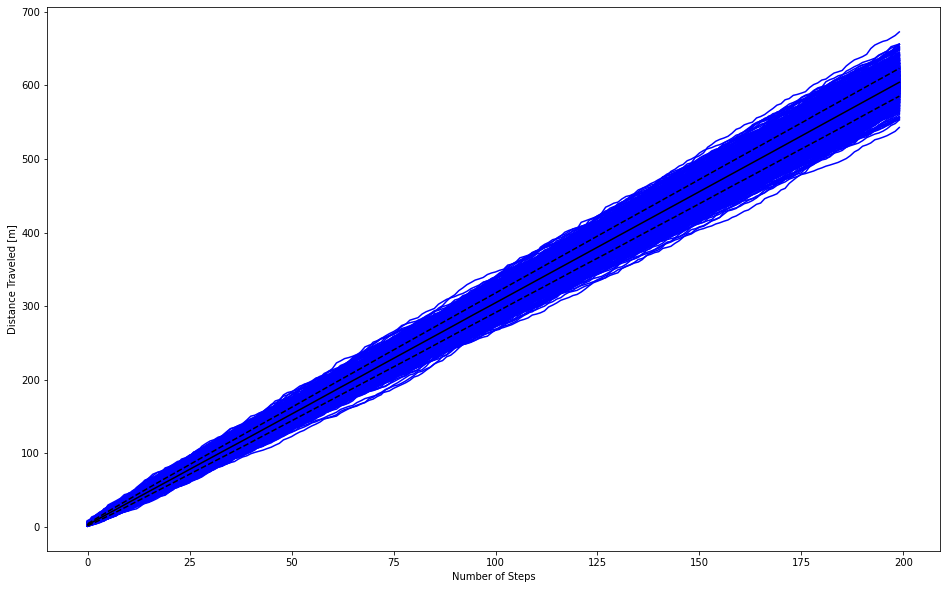

In [23]:
# This figure plots all of the walkers, then calculates the mean and standard deviation of 
# all walkers at each time step (across all columns for each row).
# The array containing the mean values is plotted as a solid black line, and then 
# two dashed black lines are plotted, representing one standard deviation above and below the mean.

# Calculates the mean of all walkers at each time step
mean_X = np.mean(X,axis=1) 
# Calculates the standard deviation of all walkers at each time step
std_X = np.std(X,axis=1) 

plt.figure(figsize=(16,10)) 

# Plots all walkers with blue lines
plt.plot(np.arange(Nt),X,'b-') 
# Plots the array containing the mean values of all walkers at each time step as a solid black line
plt.plot(np.arange(Nt),mean_X,'k-')
# Plots a dashed black line at one standard deviation above the mean for all walkers at each time step
plt.plot(np.arange(Nt),mean_X + std_X, 'k--')
# Plots a dashed black line at one standard deviation below the mean for all walkers at each time step
plt.plot(np.arange(Nt),mean_X - std_X, 'k--')

# Axis labels
plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]') 

In [26]:
# In order to find our range, we need to find the maximum distance 
# traveled at the last time step across all walkers.
# We already know our minimum value for the initial time step across all walkers is 1.25.
print(max(X[199,:]))

# Based on these values, we will choose a range of 0 to 700

672.6635350210549


Text(0, 0.5, 'Frequency [-]')

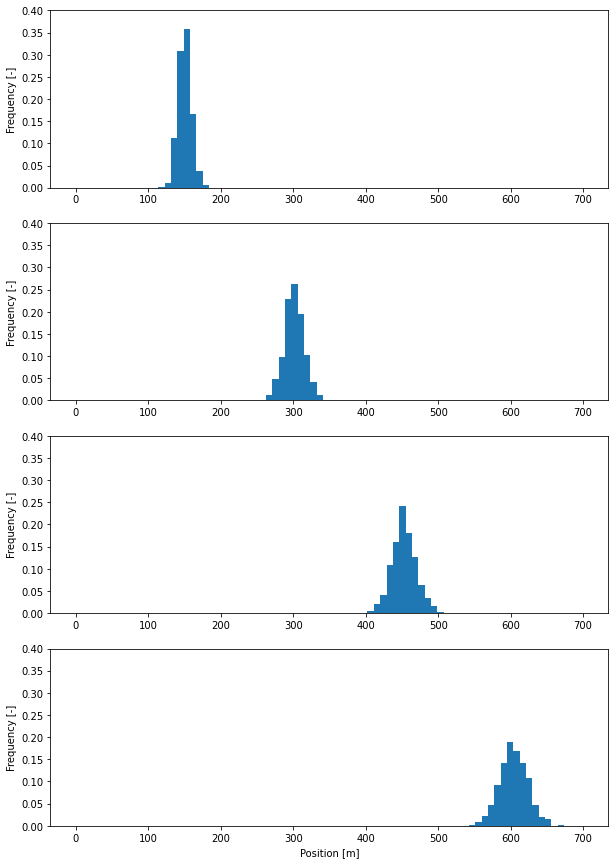

In [52]:
# These figures plot histogram distributions of the walkers at 
# time step 50, 100, 150, and 200. The range was determined in the previous cell,
# wherease the bin number was determined by trial-and-error. I plotted the histograms
# with 30, 40, 50, 60, 70, and 80 bins, and I decided that 80 bins captured the distributions best.

# The histogram function returns array x, the counts of the walkers 
# that fall into each bin and array be, which defines the bin edges.
x_50, be_50 = np.histogram(X[49,:], bins=80, range=(0,700))
x_100, be_100 = np.histogram(X[99,:], bins=80, range=(0,700))
x_150, be_150 = np.histogram(X[149,:], bins=80, range=(0,700))
x_200, be_200 = np.histogram(X[-1,:], bins=80, range=(0,700))

# In order to plot the histograms, we need to first give the x values for each bar.
# These are calculated by finding the midpoint of consecutive bin edges: (be[1:]+be[:-1])/2
# The y values of each bar are found using the counts of the walkers divided by total 
# number of walkers: (x/np.sum(x)). This calculates the frequencies of the walkers, 
# and ensures all of the bin heights will sum to 1.
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [69]:
Nt = 300
Nx = 3

mu_x = 0.5
s_x = 1.5
mu_y = 5.0
s_y = 2.5

# Define each walker matrix
X1 = np.zeros((Nt,2))
X2 = np.zeros((Nt,2))
X3 = np.zeros((Nt,2))

# Loop through each row to calculate x and y values
for i in np.arange(Nt): 

    # x,y steps for X1
    # Calculate the step size at step i for x direction
    x1_i = s_x*np.random.randn() + mu_x
    # Calculate the step size at step i for y direction
    y1_i = s_y*np.random.randn() + mu_y
    
    # Assign values
    if(i==0): 
        X1[i,0] = 0.0 + x1_i 
        X1[i,1] = 0.0 + y1_i 
    else:
        X1[i,0] = X1[i-1,0] + x1_i 
        X1[i,1] = X1[i-1,1] + y1_i 
    
    
    
    # x,y steps for X2
    # Calculate the step size at step i for x direction
    x2_i = s_x*np.random.randn() + mu_x
    # Calculate the step size at step i for y direction
    y2_i = s_y*np.random.randn() + mu_y
    
    # Assign values
    if(i==0): 
        X2[i,0] = 0.0 + x2_i 
        X2[i,1] = 0.0 + y2_i 
    else:
        X2[i,0] = X2[i-1,0] + x2_i 
        X2[i,1] = X2[i-1,1] + y2_i 
    
    
    
    
    # x,y steps for X3
    # Calculate the step size at step i for x direction
    x3_i = s_x*np.random.randn() + mu_x
    # Calculate the step size at step i for y direction
    y3_i = s_y*np.random.randn() + mu_y
    
    # Assign values
    if(i==0): 
        X3[i,0] = 0.0 + x3_i 
        X3[i,1] = 0.0 + y3_i 
    else:
        X3[i,0] = X3[i-1,0] + x3_i 
        X3[i,1] = X3[i-1,1] + y3_i 


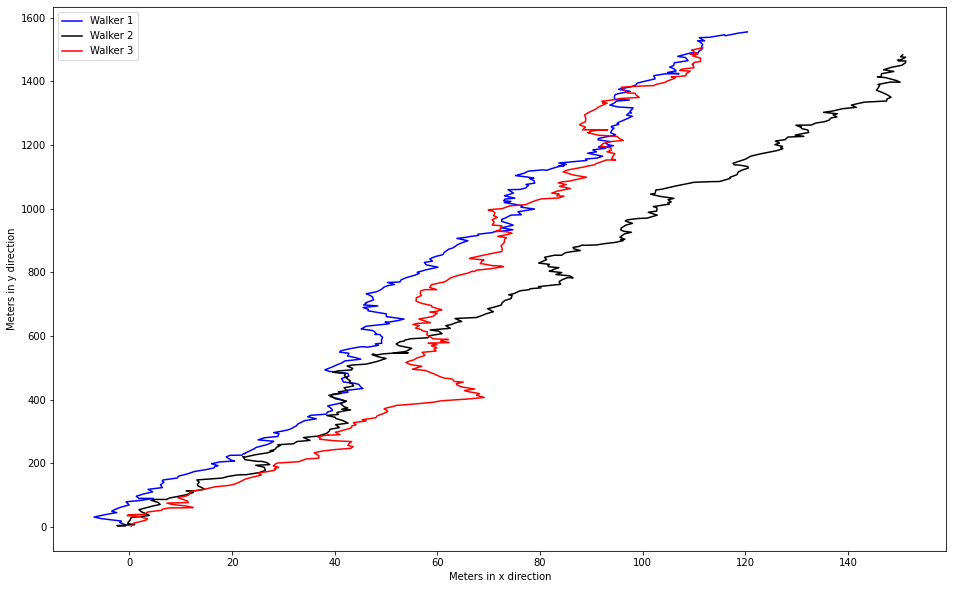

In [81]:
# Plot the three walkers on the same plot
plt.figure(figsize=(16,10)) 

# Plot walker 1
plt.plot(X1[:,0],X1[:,1],'b-',label='Walker 1') 

# Plot walker 2
plt.plot(X2[:,0],X2[:,1],'k-',label='Walker 2') 

# Plot walker 3
plt.plot(X3[:,0],X3[:,1],'r-',label='Walker 3') 

# Axis labels
plt.xlabel('Meters in x direction') 
plt.ylabel('Meters in y direction') 

# Legend
plt.legend()